In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns; sns.set()
import numpy as np

In [25]:

os_names = {
    "darwin": "Mac",
    "darwin-arm": "Mac ARM",
    "darwin-intel": "Mac Intel",
    "linux": "Linux",
    "win32": "Windows"
}
def generate_metric_charts(platform:str, workloads:[str]):
    fig, ax = plt.subplots(figsize=[5,3])
    ax.set_ylim(0, 60)
    ax.set_xlim(0, 100)

    platform_path = os.path.join(os.getcwd(), "results", platform)
    for date in os.listdir(platform_path):
        for workload in workloads:
            all_data = []
            execution_path = os.path.join(platform_path, date, workload)
            if not os.path.isdir(execution_path):
                continue
            for csv_file in os.listdir(execution_path):
                if not csv_file.endswith(".csv"):
                    continue
                df = pd.read_csv(os.path.join(execution_path, csv_file))
                key = "PACAKGE_ENERGY (W)"
                if "CPU_ENERGY (J)" in df.columns:
                    key = "CPU_ENERGY (J)"
                if "PACAKGE0_ENERGY (W)" in df.columns:
                    key = "PACAKGE0_ENERGY (W)"
                if "SYSTEM_POWER (Watts)" in df.columns:
                    key = "SYSTEM_POWER (Watts)"
                data = df[key].copy().to_list()
                if key != "CPU_POWER (Watts)" and key != "SYSTEM_POWER (Watts)":
                    df[key + "_original"] = df[key].copy()
                    for i in range(0, len(data)):
                        if i in df[key + "_original"] and i - 1 in df[key + "_original"]:
                            # diff with previous value and convert to watts
                            data[i] = (data[i] - df[key + "_original"][i - 1]) * (1000 / df["Delta"][i])
                        else:
                            data[i] = 0
                # data = data[1:-1]
                for i in range(0, len(data)):
                    all_data.append({"Time": i, "CPU_POWER (Watts)": data[i]})
    
            plot = sns.lineplot(data=pd.DataFrame(all_data), x="Time", y="CPU_POWER (Watts)", estimator=np.median,errorbar=lambda x: (np.quantile(x, 0.25), np.quantile(x, 0.75)), ax=ax, legend=True, label=workload.title())
            plot.set(xlabel=None, ylabel=None)
            plot.set_title(os_names[platform])
    plot.get_figure().savefig(os.path.join("figures", f"{os_names[platform]}.pdf"))
    plt.show()

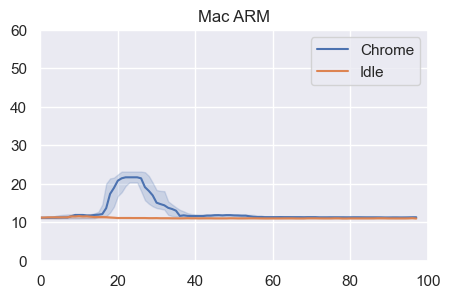

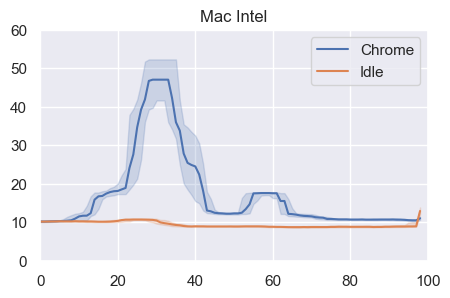

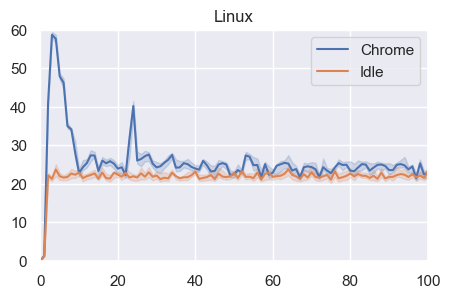

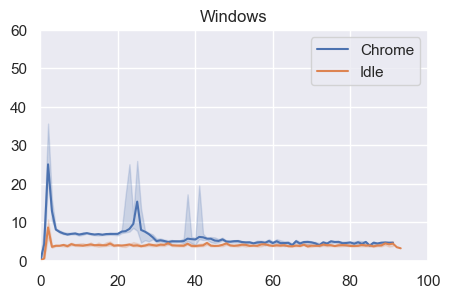

In [26]:
# generate_metric_charts("darwin", ["chrome"])
generate_metric_charts("darwin-arm", ["chrome", "idle"])
generate_metric_charts("darwin-intel", ["chrome", "idle"])
generate_metric_charts("linux", ["chrome", "idle"])
generate_metric_charts("win32", ["chrome", "idle"])